## LIVER DISEASE PREDICTION EDA

#### DATA SCIENCE WORKFLOW

* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

#### 1) PROBLEM STATEMENT

* This project understands how Patients with Liver disease have been continuously 
increasing based on the factors like Age,Gender,Bilirubin,Aminotransferase,
Protiens,Albumin etc.,


##### 2) DATA COLLECTION

* This dataset has been downloaded from the `UCI ML Repository`
* Dataset Link - https://archive.ics.uci.edu/dataset/225/ilpd+indian+liver+patient+dataset

##### 2.1 Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the data

In [2]:
data = pd.read_csv('data/indian_liver_patient.csv')


#### Top 5 Records

In [3]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


##### 2.2 dataset Information

* Columns of the dataset:

    * *Age* :Age of the patient
    * *Gender* :Gender of the patient [Male, Female]
    * *Total Bilirubin* : A yellow substance made during the breakdown of red blood cells. High levels can indicate liver problems.
    * *Direct Bilirubin* : 
    * *Alkaline Phosphotase* : An enzyme related to the liver and bones. High levels may indicate liver or bone disease.
    * *Alamine Aminotransferase* : A liver enzyme. High levels suggest liver cell damage.
    * *Aspartate Aminotransferase* : An enzyme found in the liver and other organs. High levels may indicate liver or muscle damage.
    * *Total Protiens* : The total amount of proteins (albumin + globulin) in the blood.
    * *Albumin* : A protein made by the liver that helps transport substances in the blood.
    * *Albumin and Globulin Ratio* : The ratio of albumin to globulin; helps detect liver or immune system problems.
* Any patient whose age exceeded 89 is listed as being of age "90".

#### 3) Basic Data Checks

* Check Shape and Columns
* Check Missing values 
* Check Duplicates
* Check data types
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

#### 3.1 Shape and Columns

In [4]:
data.shape

(583, 11)

In [5]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

* This dataset consists of 11 columns, 583 rows.


#### 3.2 Check Missing values

In [6]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

* 4 Missing values only in `Albumin_and_Globulin_Ratio`.

#### 3.3 Check Duplicates

In [7]:
data.duplicated().sum()

np.int64(13)

* There are 13 duplicated rows in the dataset

##### All instances of the duplicated values including the first ones

In [8]:
data[data.duplicated(keep= False)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
54,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1


In [9]:
data.drop_duplicates(inplace=True)

#### 3.4 Datatypes of the dataset

In [10]:
data.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Gender                      570 non-null    object 
 2   Total_Bilirubin             570 non-null    float64
 3   Direct_Bilirubin            570 non-null    float64
 4   Alkaline_Phosphotase        570 non-null    int64  
 5   Alamine_Aminotransferase    570 non-null    int64  
 6   Aspartate_Aminotransferase  570 non-null    int64  
 7   Total_Protiens              570 non-null    float64
 8   Albumin                     570 non-null    float64
 9   Albumin_and_Globulin_Ratio  566 non-null    float64
 10  Dataset                     570 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.4+ KB


* Age is the only column of categorical Feature


#### 3.5 Check the number of unique values of each column

In [12]:
data.nunique()

Age                            72
Gender                          2
Total_Bilirubin               113
Direct_Bilirubin               80
Alkaline_Phosphotase          263
Alamine_Aminotransferase      152
Aspartate_Aminotransferase    177
Total_Protiens                 58
Albumin                        40
Albumin_and_Globulin_Ratio     69
Dataset                         2
dtype: int64

#### 3.6 Check statistics of data set

In [13]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,1.287719
std,16.242182,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


#### Insights 

* Age Range: The age range from 4 to 90 years, with 50% of the patients aged below 45, which indicates liver disease affects relatively younger individuals as well.
* Features like `Alkaline_Phosphotase`, `Alamine_Aminotransferase`,`Aspartate_Aminotransferase`
have `high std`.
* `Total_Protiens`,`Albumin_and_Globulin_Ratio` and `Albumin` has `lower std`, mean and median(i.e., 50%) are nearly same 
* `Dataset` Feature have min = 1, max = 2

In [14]:
#### Defining Numerical and Categorical Features
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']

## printing columns
print('we have {} number of categorical features:{}'.format(len(categorical_features),categorical_features))
print('we have {} number of numerical features:{}'.format(len(numerical_features),numerical_features))


we have 1 number of categorical features:['Gender']
we have 10 number of numerical features:['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset']


In [15]:
#### Categories i categorical data
print('Categories in Gender:{}'.format(data['Gender'].unique()))

Categories in Gender:['Female' 'Male']


## 4 Exploring Data 

#### 4.1 Univariate Analysis

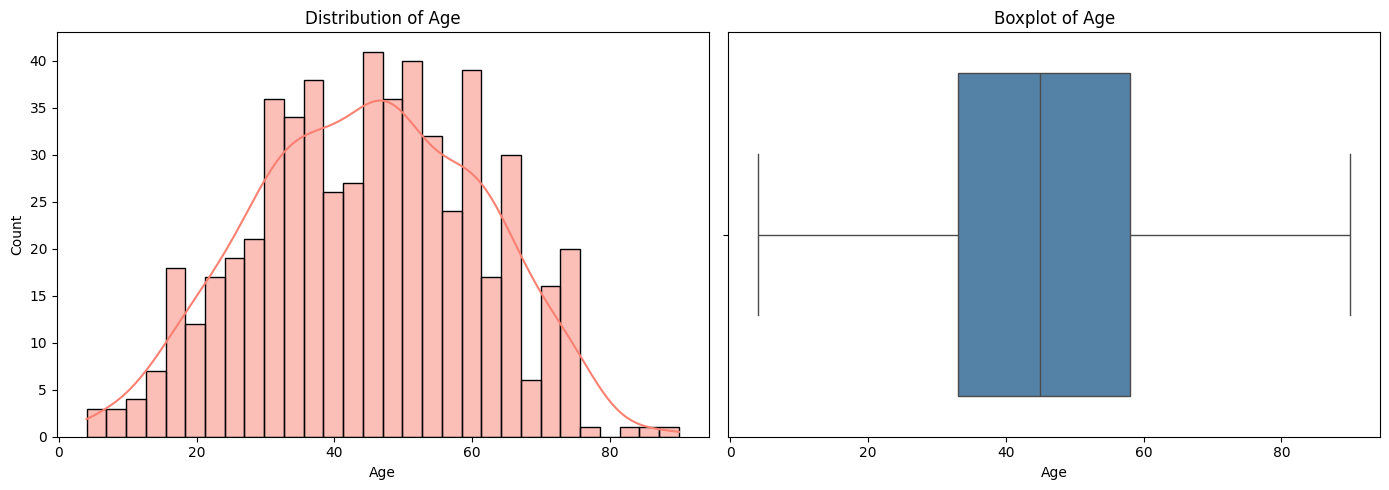

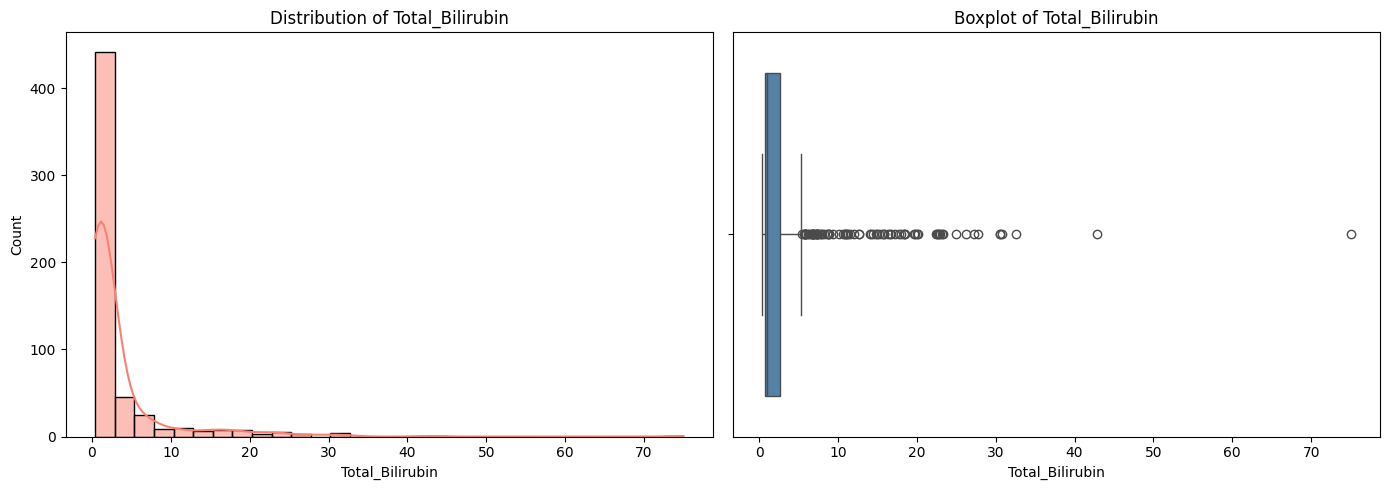

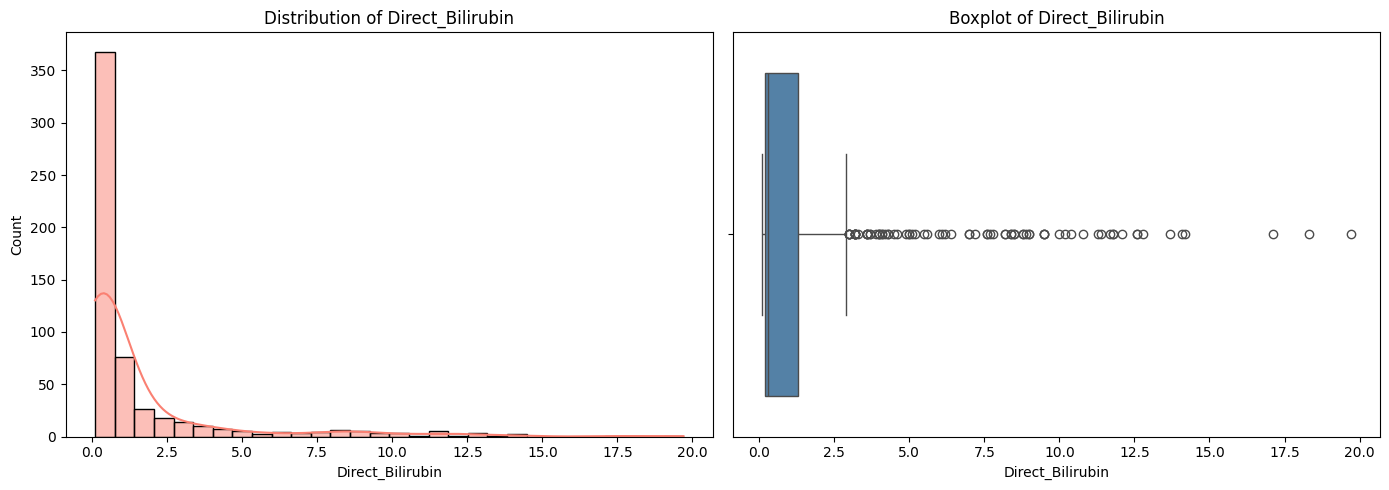

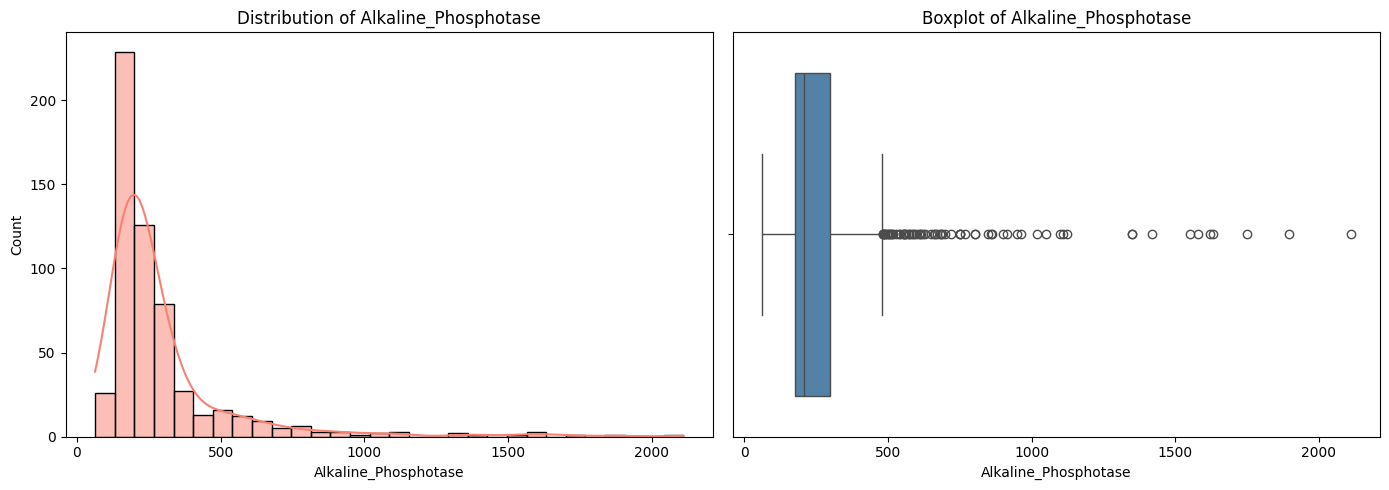

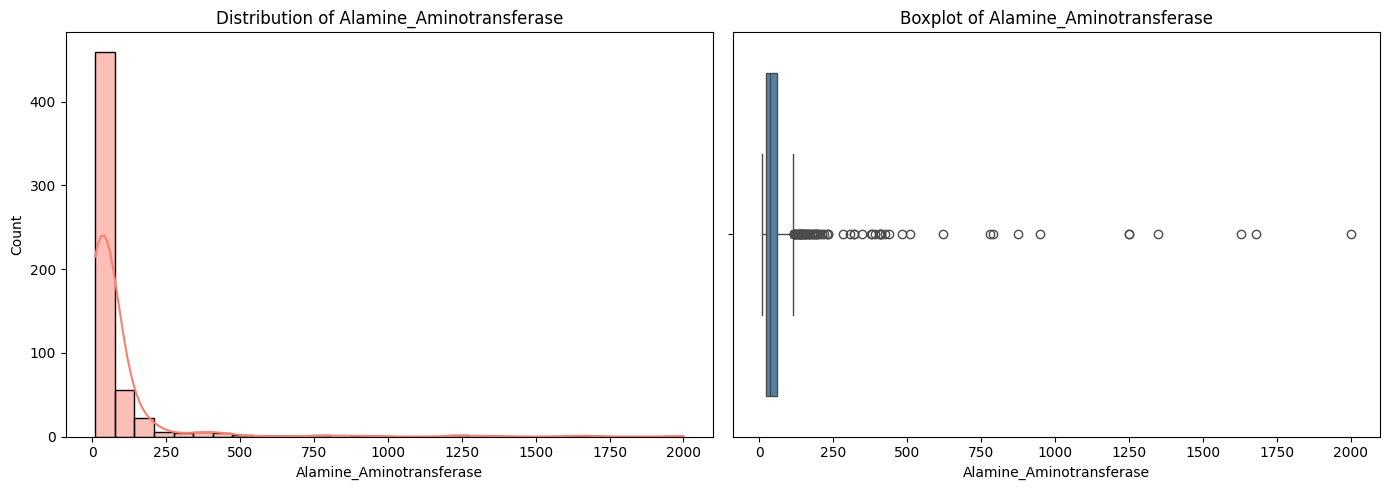

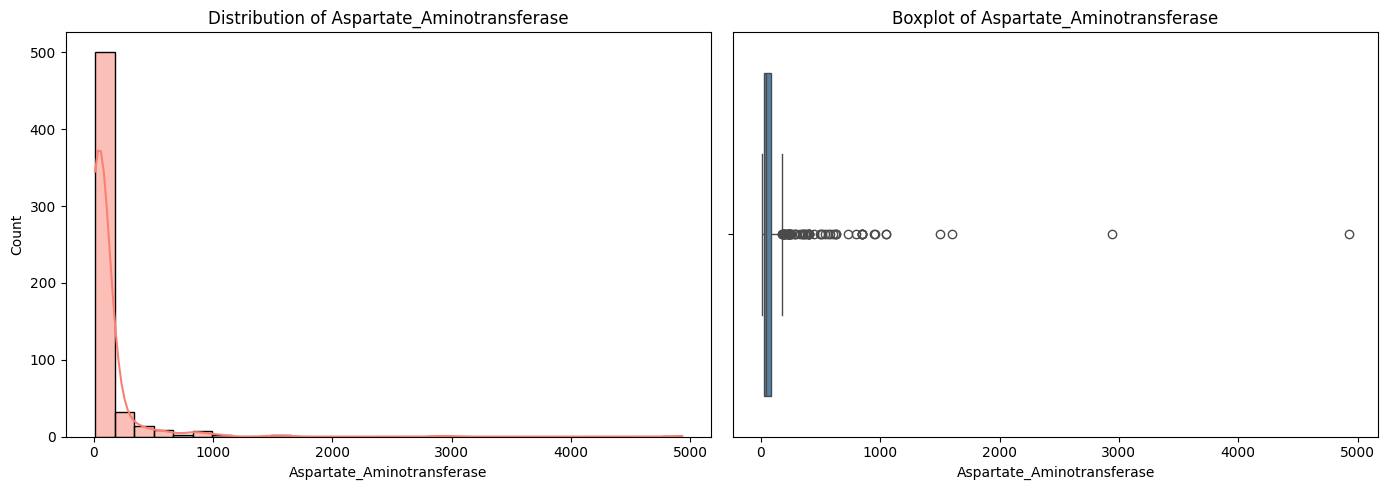

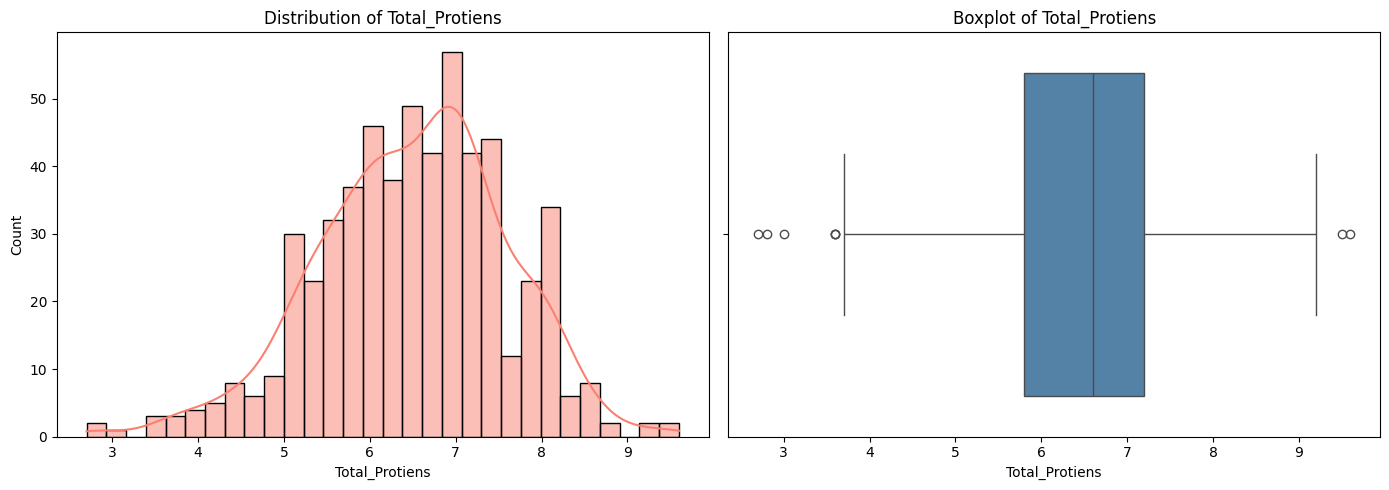

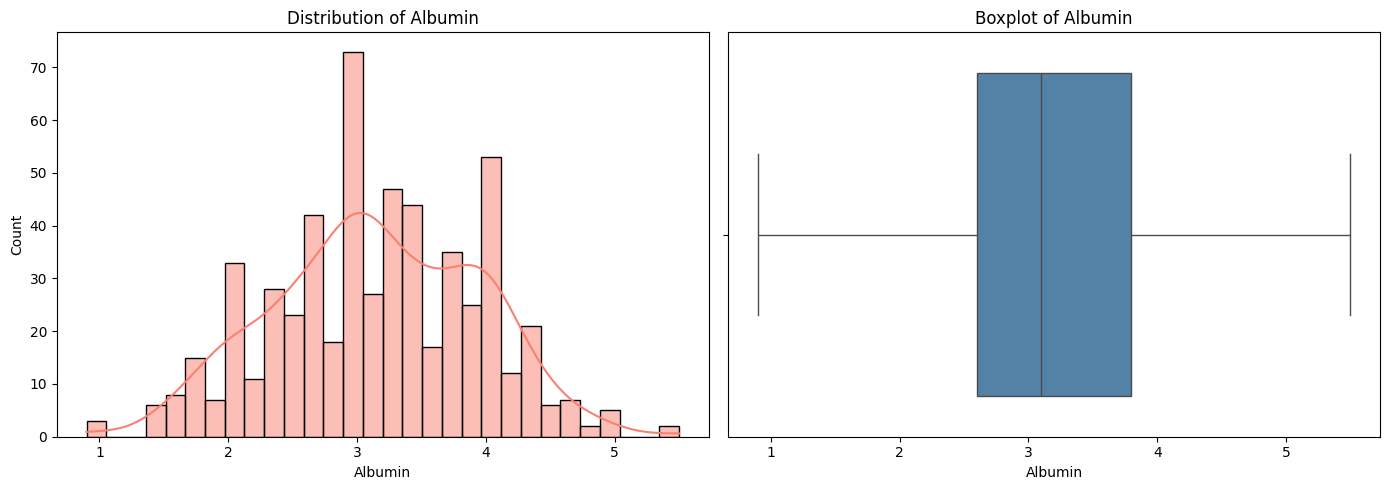

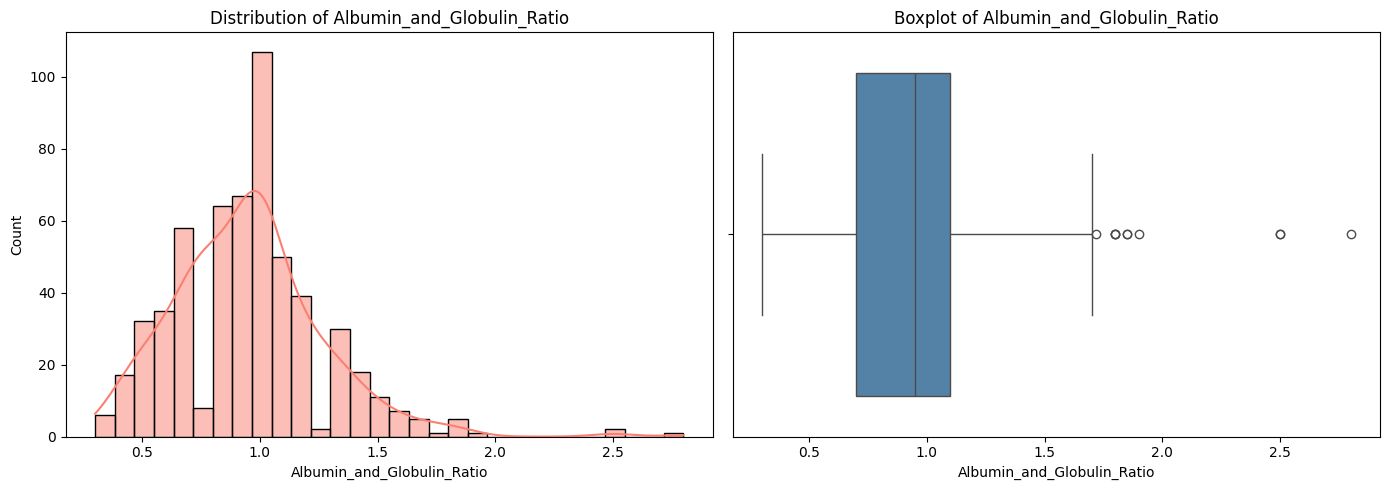

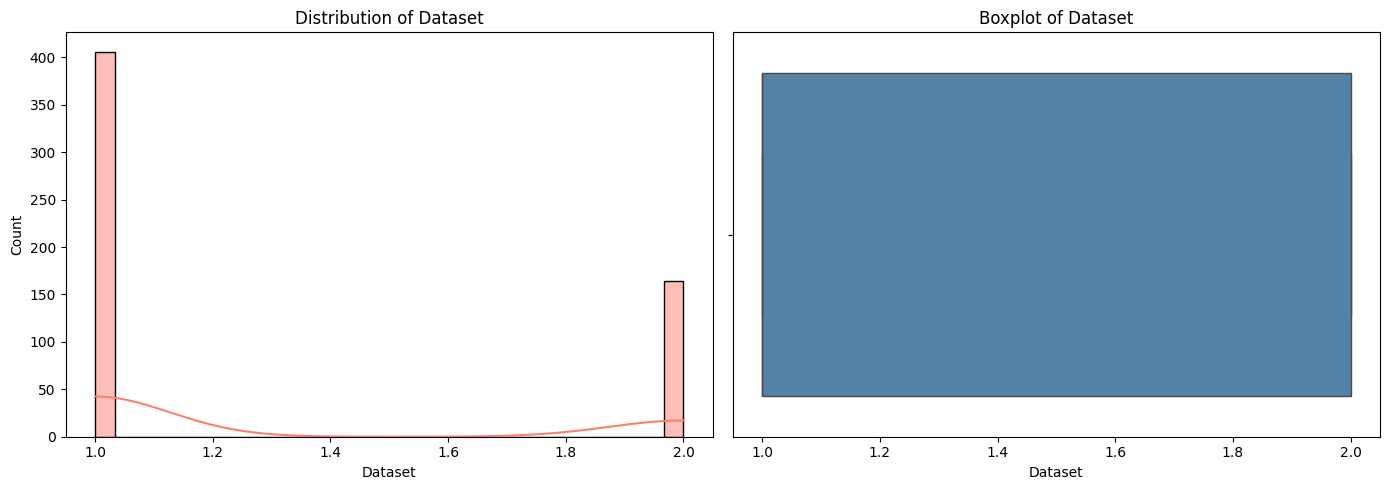

In [16]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, bins=30, color='salmon')
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col], color='steelblue')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

#### Insights 

* Features like Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase,
Alamine_Aminotransferase has huge number of outliers.
* Total_Protiens and Alubumin_and_Globulin_Ratio has less number of outliers.
* Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase are `Right-skewed`.
* Alubumin_and_Globulin_Ratio has `slight Right-skewness`.
* Number of Patients who has `Liver disease` is greater than who has `no liver disease`.

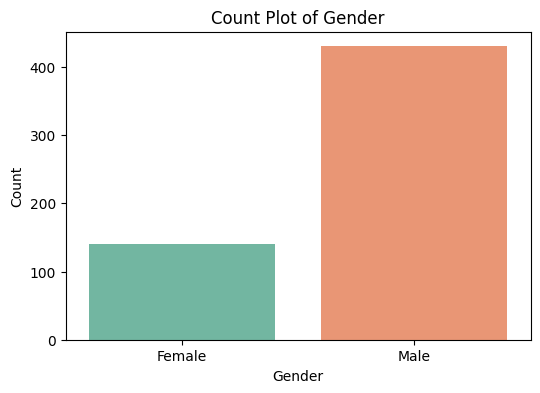

In [17]:
categorical_cols = data.select_dtypes(include=['object']).columns


for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data[col], palette='Set2')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

#### Insights

* In this Dataset we have more `Male` candidates than `Female` candidates which indicates `Imbalance dataset`

#### 4.2 Bivariant Analysis

##### 4.2.1 Analysis of Numerical VS Numerical Features

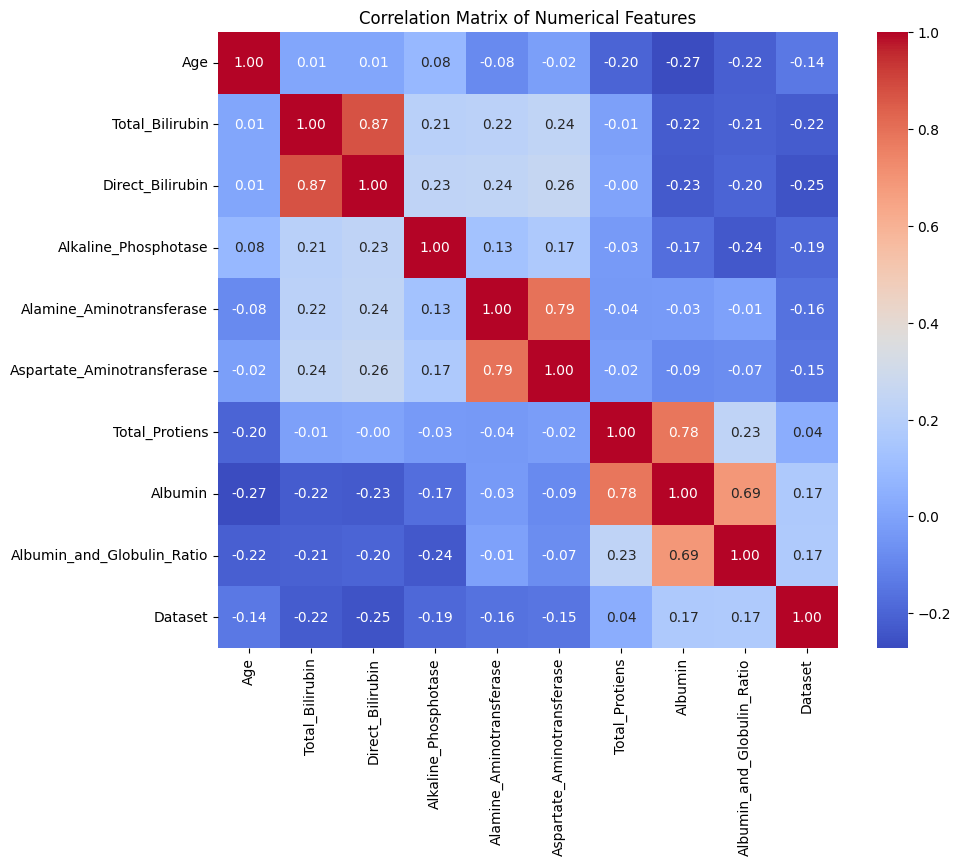

In [18]:
###### correlation heatmap
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(numeric_only = True), annot= True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

##### Features with High Negative and Positive Correlations

In [19]:
## Sorting the correlation pairs
corr_matrix = data.corr(numeric_only=True)
corr_pairs = corr_matrix.unstack().sort_values()

## Removing self correlations (They always tends to be 1)
corr_pairs = corr_pairs[corr_pairs != 1]

## top 5 Positive and Negative correlations
print("Top 5 Positive Correlations:\n", corr_pairs[-5:])
print("Top 5 Negative Correlation:\n", corr_pairs[:5])

Top 5 Positive Correlations:
 Albumin                     Total_Protiens                0.784731
Alamine_Aminotransferase    Aspartate_Aminotransferase    0.791857
Aspartate_Aminotransferase  Alamine_Aminotransferase      0.791857
Direct_Bilirubin            Total_Bilirubin               0.874116
Total_Bilirubin             Direct_Bilirubin              0.874116
dtype: float64
Top 5 Negative Correlation:
 Age                   Albumin                      -0.271170
Albumin               Age                          -0.271170
Dataset               Direct_Bilirubin             -0.250666
Direct_Bilirubin      Dataset                      -0.250666
Alkaline_Phosphotase  Albumin_and_Globulin_Ratio   -0.236251
dtype: float64


#### Insights

* `Albumin,Total_Protiens` and `Alamine_Aminotransferase, Aspartate_Aminotransferase` and `Direct_Bilirubin,Total_Bilirubin` has High Positive Correlation with Greater than 0.75.
* `Age,Albumin` and `Dataset,Direct_Bilirubin` and `Alkaline_Phosphotase, Albumin_and_Globulin_Ratio` has High Negative Correlation.

##### 4.2.1.1 Visualizations of Positive Correlations

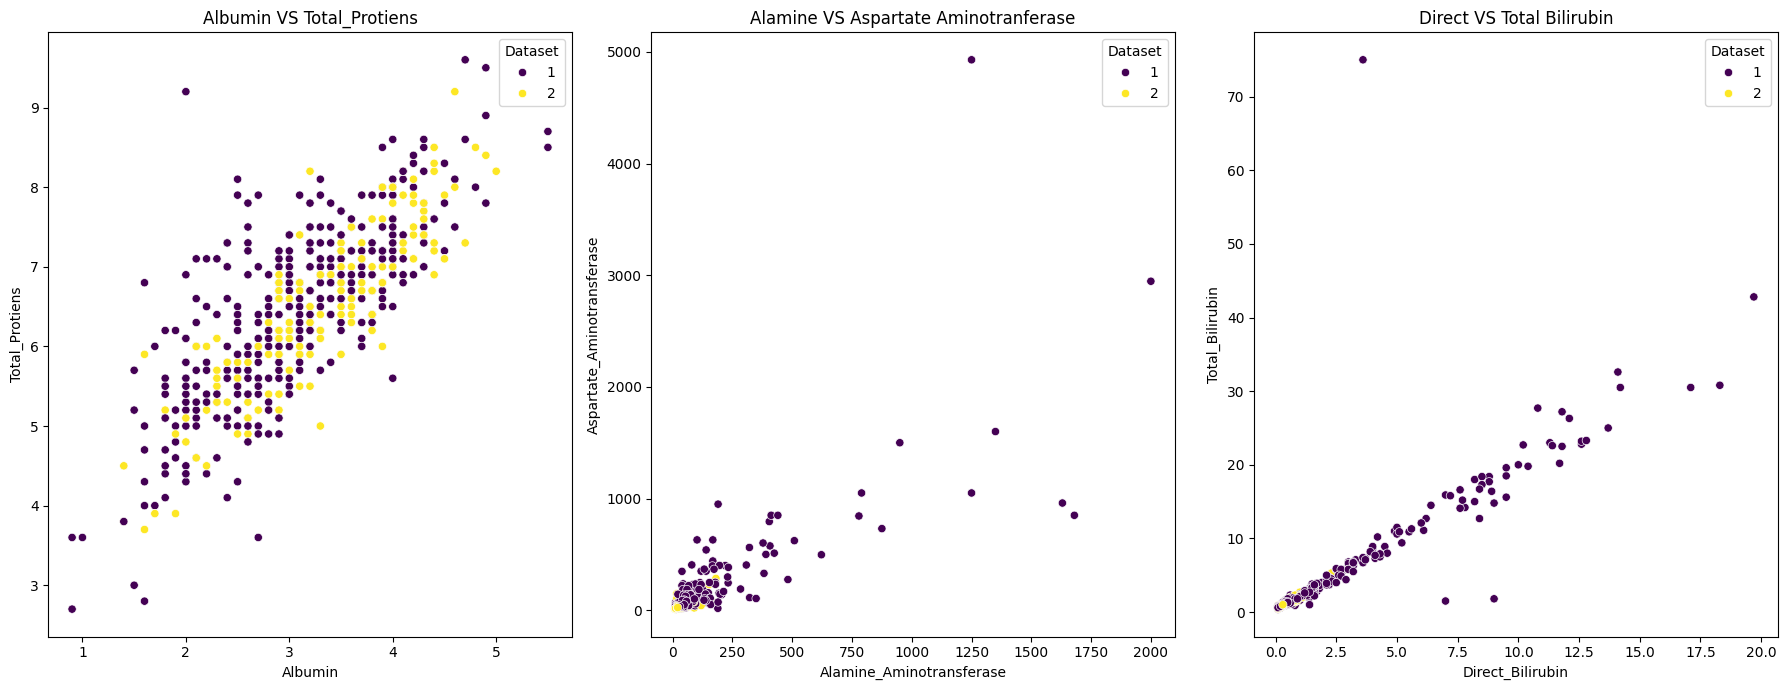

In [20]:
plt.figure(figsize=(18,7))

# 1. Albumin vs Total_Protiens
plt.subplot(1,3,1)
sns.scatterplot(data=data, x = 'Albumin', y = 'Total_Protiens', hue = 'Dataset', palette='viridis')
plt.title('Albumin VS Total_Protiens')

# 2. Alamine_Aminotransferase VS Aspartate_Aminotranferase
plt.subplot(1,3,2)
sns.scatterplot(data=data, x = 'Alamine_Aminotransferase', y = 'Aspartate_Aminotransferase', hue='Dataset', palette='viridis')
plt.title('Alamine VS Aspartate Aminotranferase')

# 3. Direct_Bilirubin VS Total_Bilirubin
plt.subplot(1,3,3)
sns.scatterplot(data=data, x = 'Direct_Bilirubin', y = 'Total_Bilirubin', hue='Dataset', palette='viridis')
plt.title('Direct VS Total Bilirubin')

plt.tight_layout()
plt.show()


#### Insights 

* Clear linear relationship `Albumin` increases, `Total_Protiens` also increase, Because Albumin is a component of total protiens in the blood.
* For most patients, both enzyme levels `Alamine,Aspartate Aminotransferase` are under 500. 
* But there are extreme outliers may indicate severe liver damage.
* `Direct and Total Bilirubin` are very strong Linear Correlation, because Direct Bilirubin is a component of Total Bilirubin.

##### 4.2.1.2 Visualizations of Negative Correlations

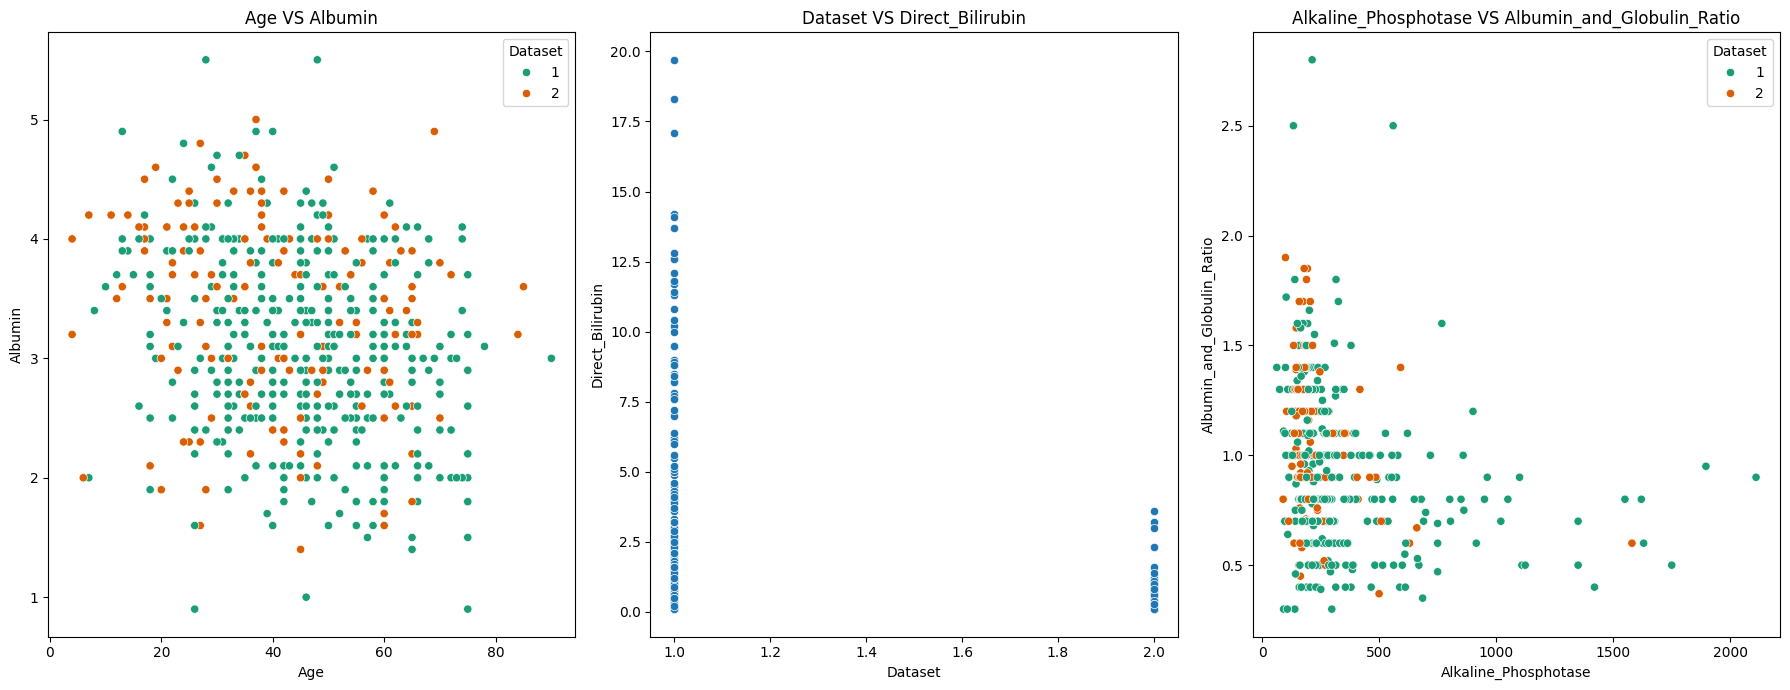

In [21]:
plt.figure(figsize=(18,7))

# 1. Age VS Albumin
plt.subplot(1,3,1)
sns.scatterplot(data= data, x= 'Age', y='Albumin',hue='Dataset', palette='Dark2')
plt.title("Age VS Albumin")

# 2. Dataset VS Direct_Bilirubin
plt.subplot(1,3,2)
sns.scatterplot(data=data, x= 'Dataset', y= 'Direct_Bilirubin', palette='Dark2')
plt.title("Dataset VS Direct_Bilirubin")

# 3. Alkaline_Phosphotase VS Albumin_and_Globulin_Ratio 
plt.subplot(1,3,3)
sns.scatterplot(data=data, x= 'Alkaline_Phosphotase', y= 'Albumin_and_Globulin_Ratio', hue='Dataset', palette='Dark2')
plt.title("Alkaline_Phosphotase VS Albumin_and_Globulin_Ratio")

plt.tight_layout()
plt.show()

#### Insights

* Age range is widespread from very young to elderly, but mostly between 30 years to 65 years.
* Patients with Albumin<3 are fairly common across all ages.
* Patients with disease and No disease are scatter throughout, but diseased patients have lower Albumin, lower Albumin levels might be an indicator of disease.
* Patients who have liver disease has wide range of Direct Bilirubin values,
Patients who has no liver disease have lower range of Direct Bilirubin values.
* Most Patients has low to mid Alkaline Phosphotase values. 
* Patients who has Liver Disease shows more extreme values in both Alkaline Phosphotase and Albumin and Globulin Ratio.

##### 4.2.2 Analysis of Numerical VS Categorical 

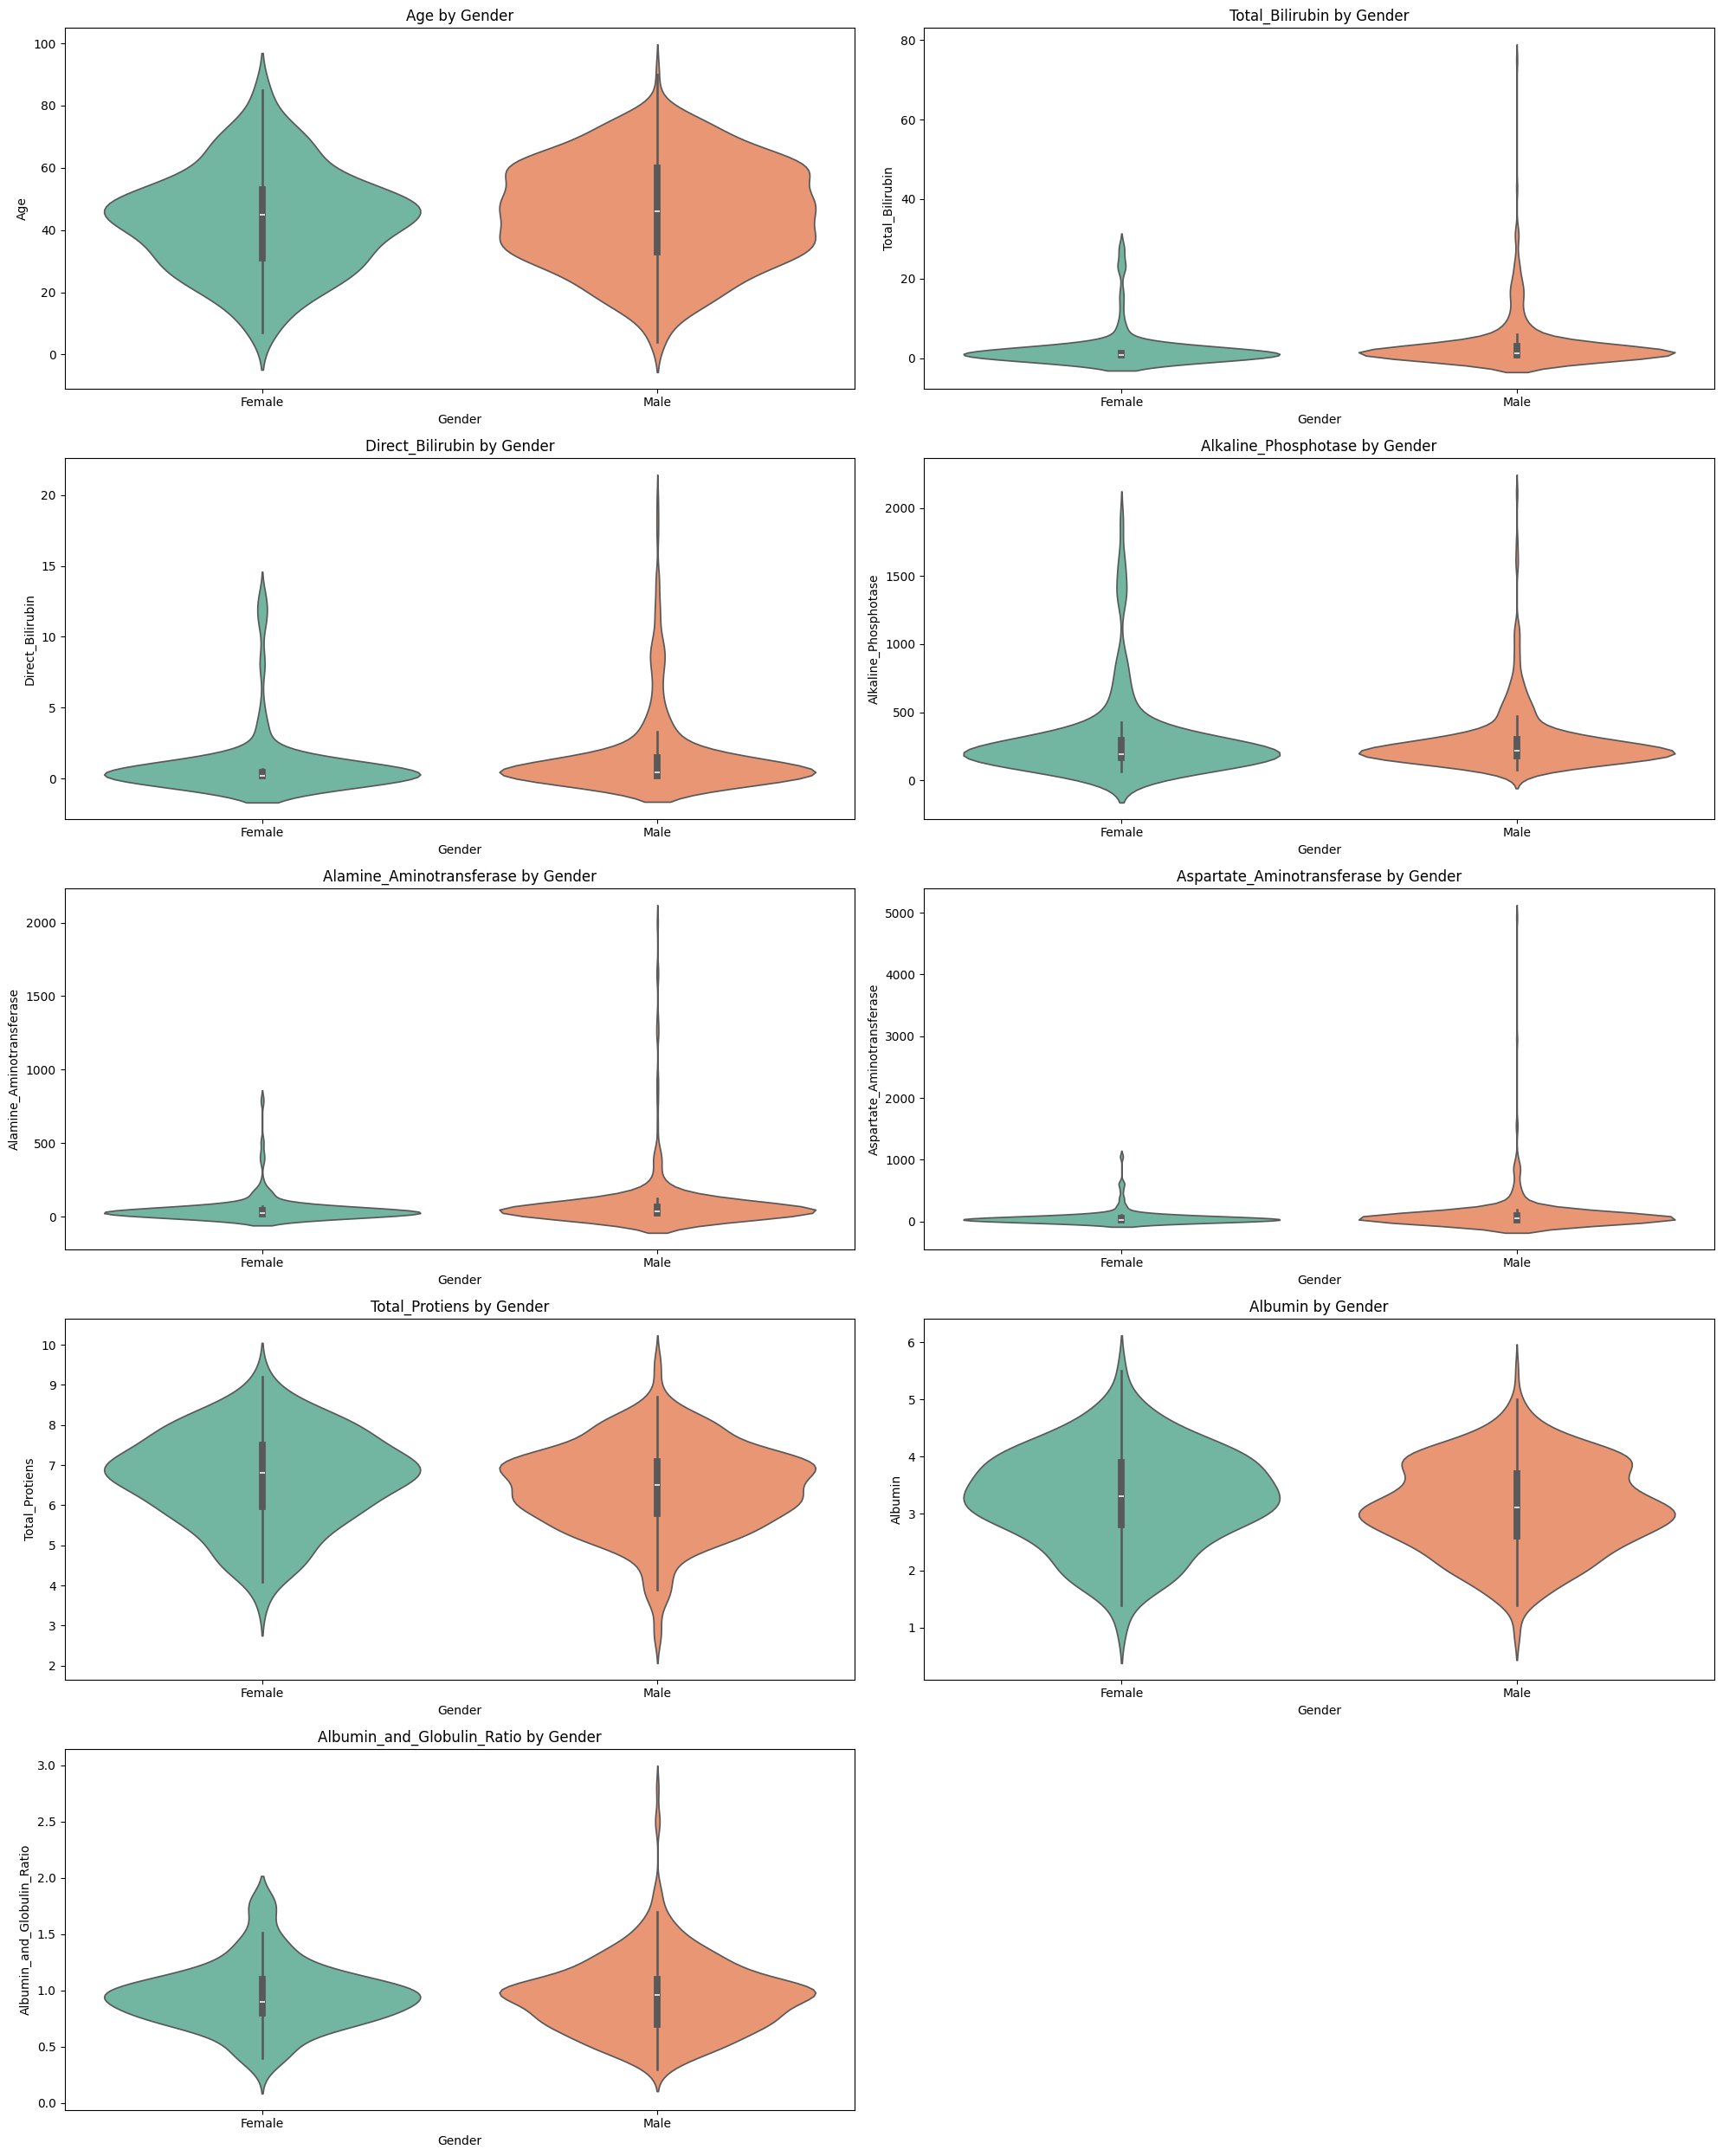

In [28]:
#### Analysis of Gender VS all Numerical Columns

numerical_columns = [feature for feature in data.columns if data[feature].dtype != 'O']

plt.figure(figsize=(20, 25))

for i, col in enumerate(numerical_columns, 1):
    if col != 'Dataset':
        plt.subplot(5, 2, i)
        sns.violinplot(data=data, x='Gender', y=col, palette='Set2')
        plt.title(f'{col} by Gender')
        plt.xlabel('Gender')
        plt.ylabel(col)

plt.tight_layout()
plt.show()


* `Age by Gender`: Males patients tend to include both younger and older extremes,while females are more concentrated in middle ages.
* `Total Bilirubin by Gender`: it has very low medians for both genders, but the spread in male suggests more severe cases.
* `Direct Bilirubin by Gender`: Females have tighter cluster near 0-2, while Elevated direct bilirubin is more common in male patients.
* `Alkaline Phosphotase by Gender`:Both genders have a huge spike at low values and a long tail of outliers. Medians are similar, but the variance is higher in males.
* `Alamine Aminotransferase by Gender`:Females have fewer extreme enzyme spikes,while male shows longer tail indicating more severe enzyme elevations.
* `Aspartate Aminotransferase by Gender`:Very high levels of AST are more common in male patients than in female patients.
* `Total Protiens by Gender`: Females have slightly more spread on the high side, males have tight inter quartile range.
* `Albumin by Gender`:  Female Patients may have marginally better albumin levels.
* `Albumin and Globulin Ratio by Gender`:  Albumin and Globulin ratio is generally similar across genders, though extreme high ratios appear only in males


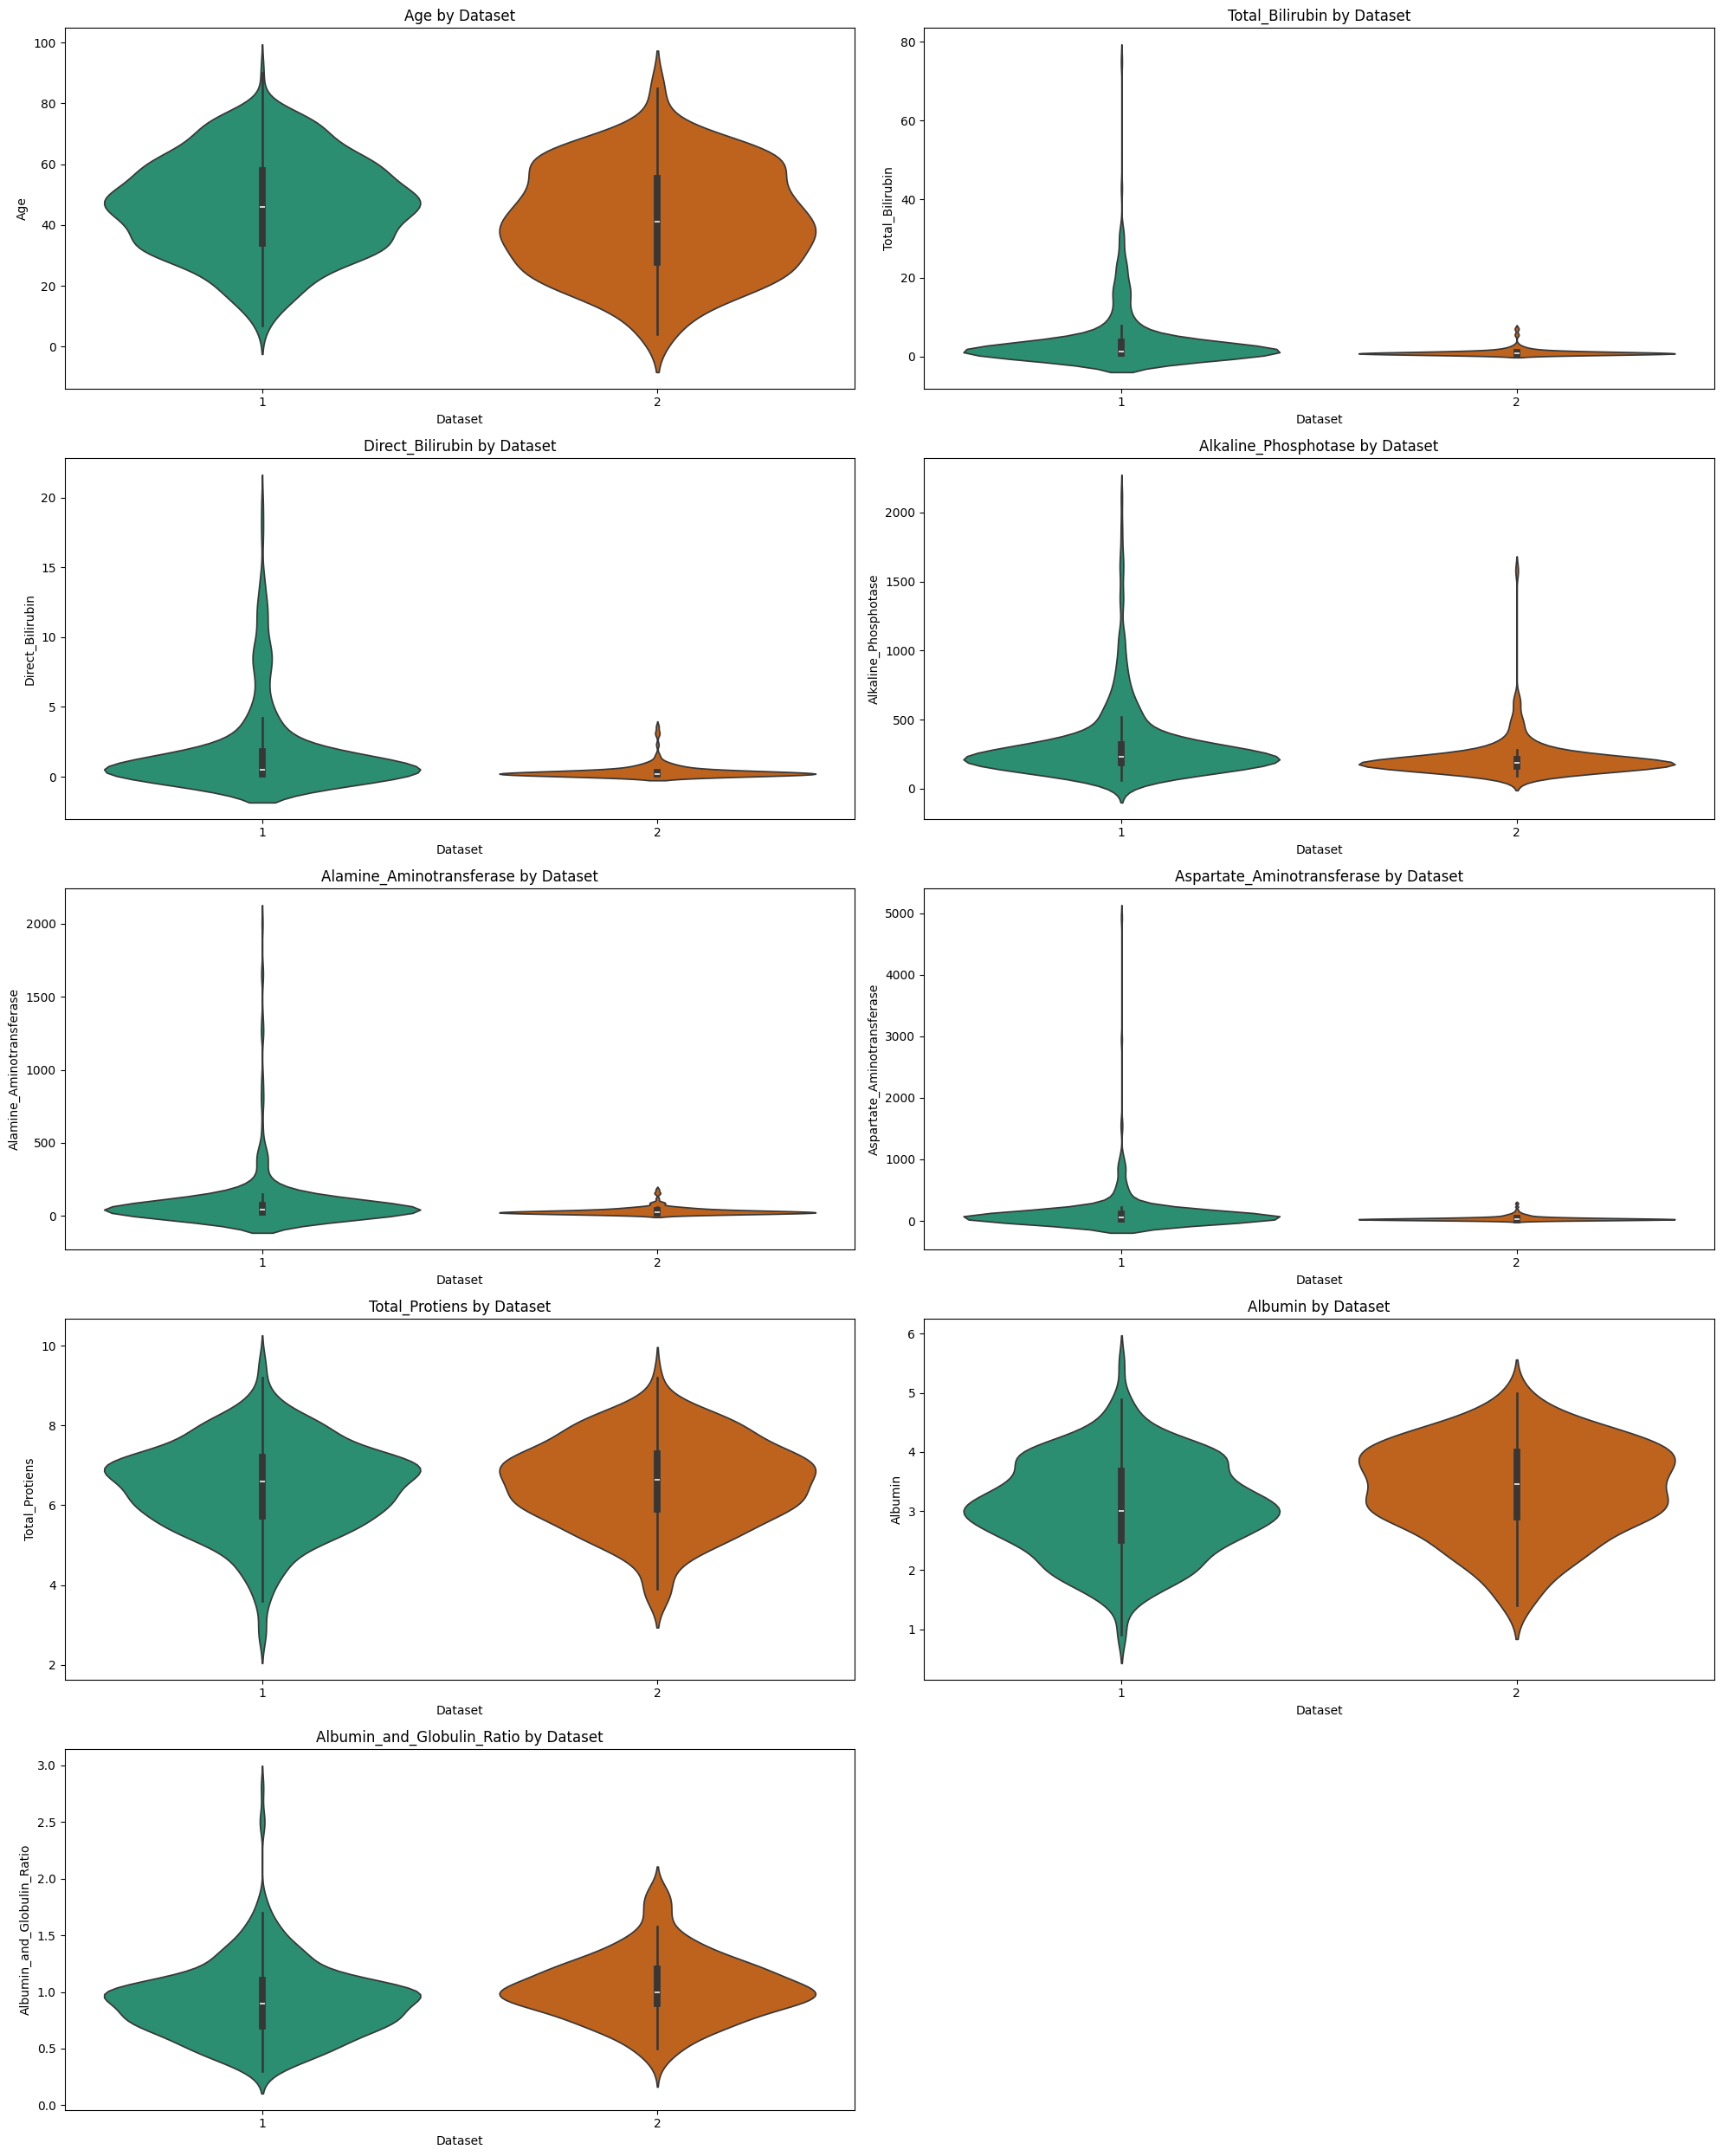

In [23]:
#### Analysis of Dataset VS Numerical Columns

numerical_columns = [feature for feature in data.columns if data[feature].dtype != 'O']

plt.figure(figsize=(20, 25))

for i, col in enumerate(numerical_columns, 1):
    if col != 'Dataset':
        plt.subplot(5, 2, i)
        sns.violinplot(data=data, x='Dataset', y=col, palette='Dark2')
        plt.title(f'{col} by Dataset')
        plt.xlabel('Dataset')
        plt.ylabel(col)

plt.tight_layout()
plt.show()


* People with median age is higher for liver disease.
* Total Bilirubin and Direct Bilirubin values are noticeably higher in people with liver disease.
* Alkaline Phosphotase, Alanine Aminotransferase, Aspartate Aminotransferase these features rise significantly with liver disease.
* Total Protiens and Albumin are slightly lower in liver disease cases.
* Albumin and Globulin Ratio has lower in liver disease cases. 

#### 4.2.3 Categorical VS Categorical Feature Analysis

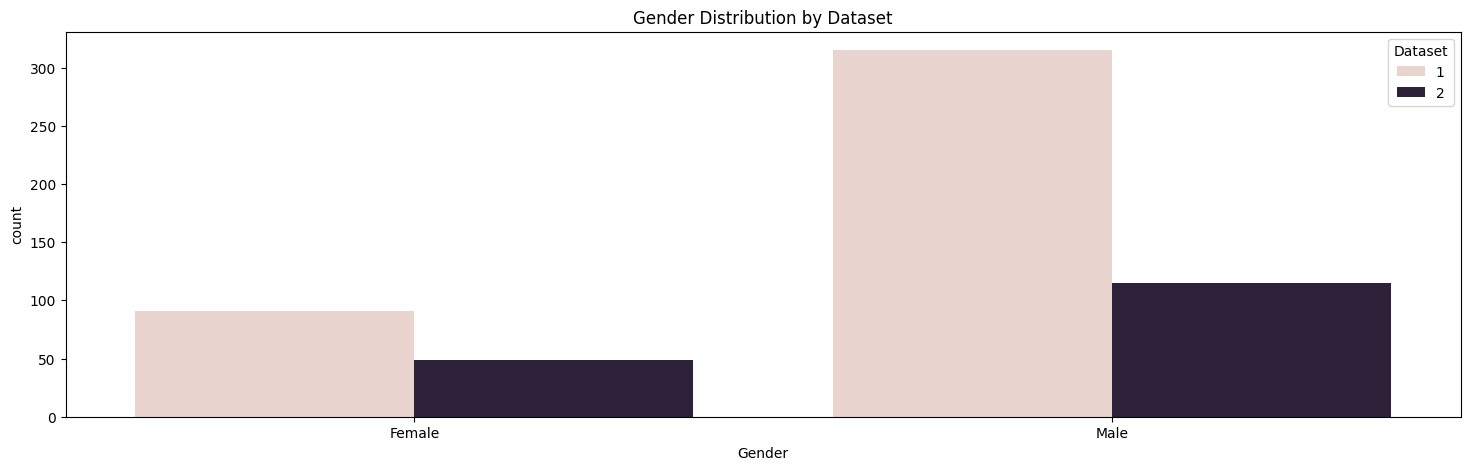

In [24]:
#### Dataset VS Gender Column Analysis

plt.figure(figsize=(18,5))
sns.countplot(x='Gender', hue='Dataset', data=data)
plt.title("Gender Distribution by Dataset")
plt.show()


* This dataset has higher Male count compare to Female, which indicates imbalance dataset.
* Patients who have liver disease are higer in both male and female

### 4.3 Multivariate analysis

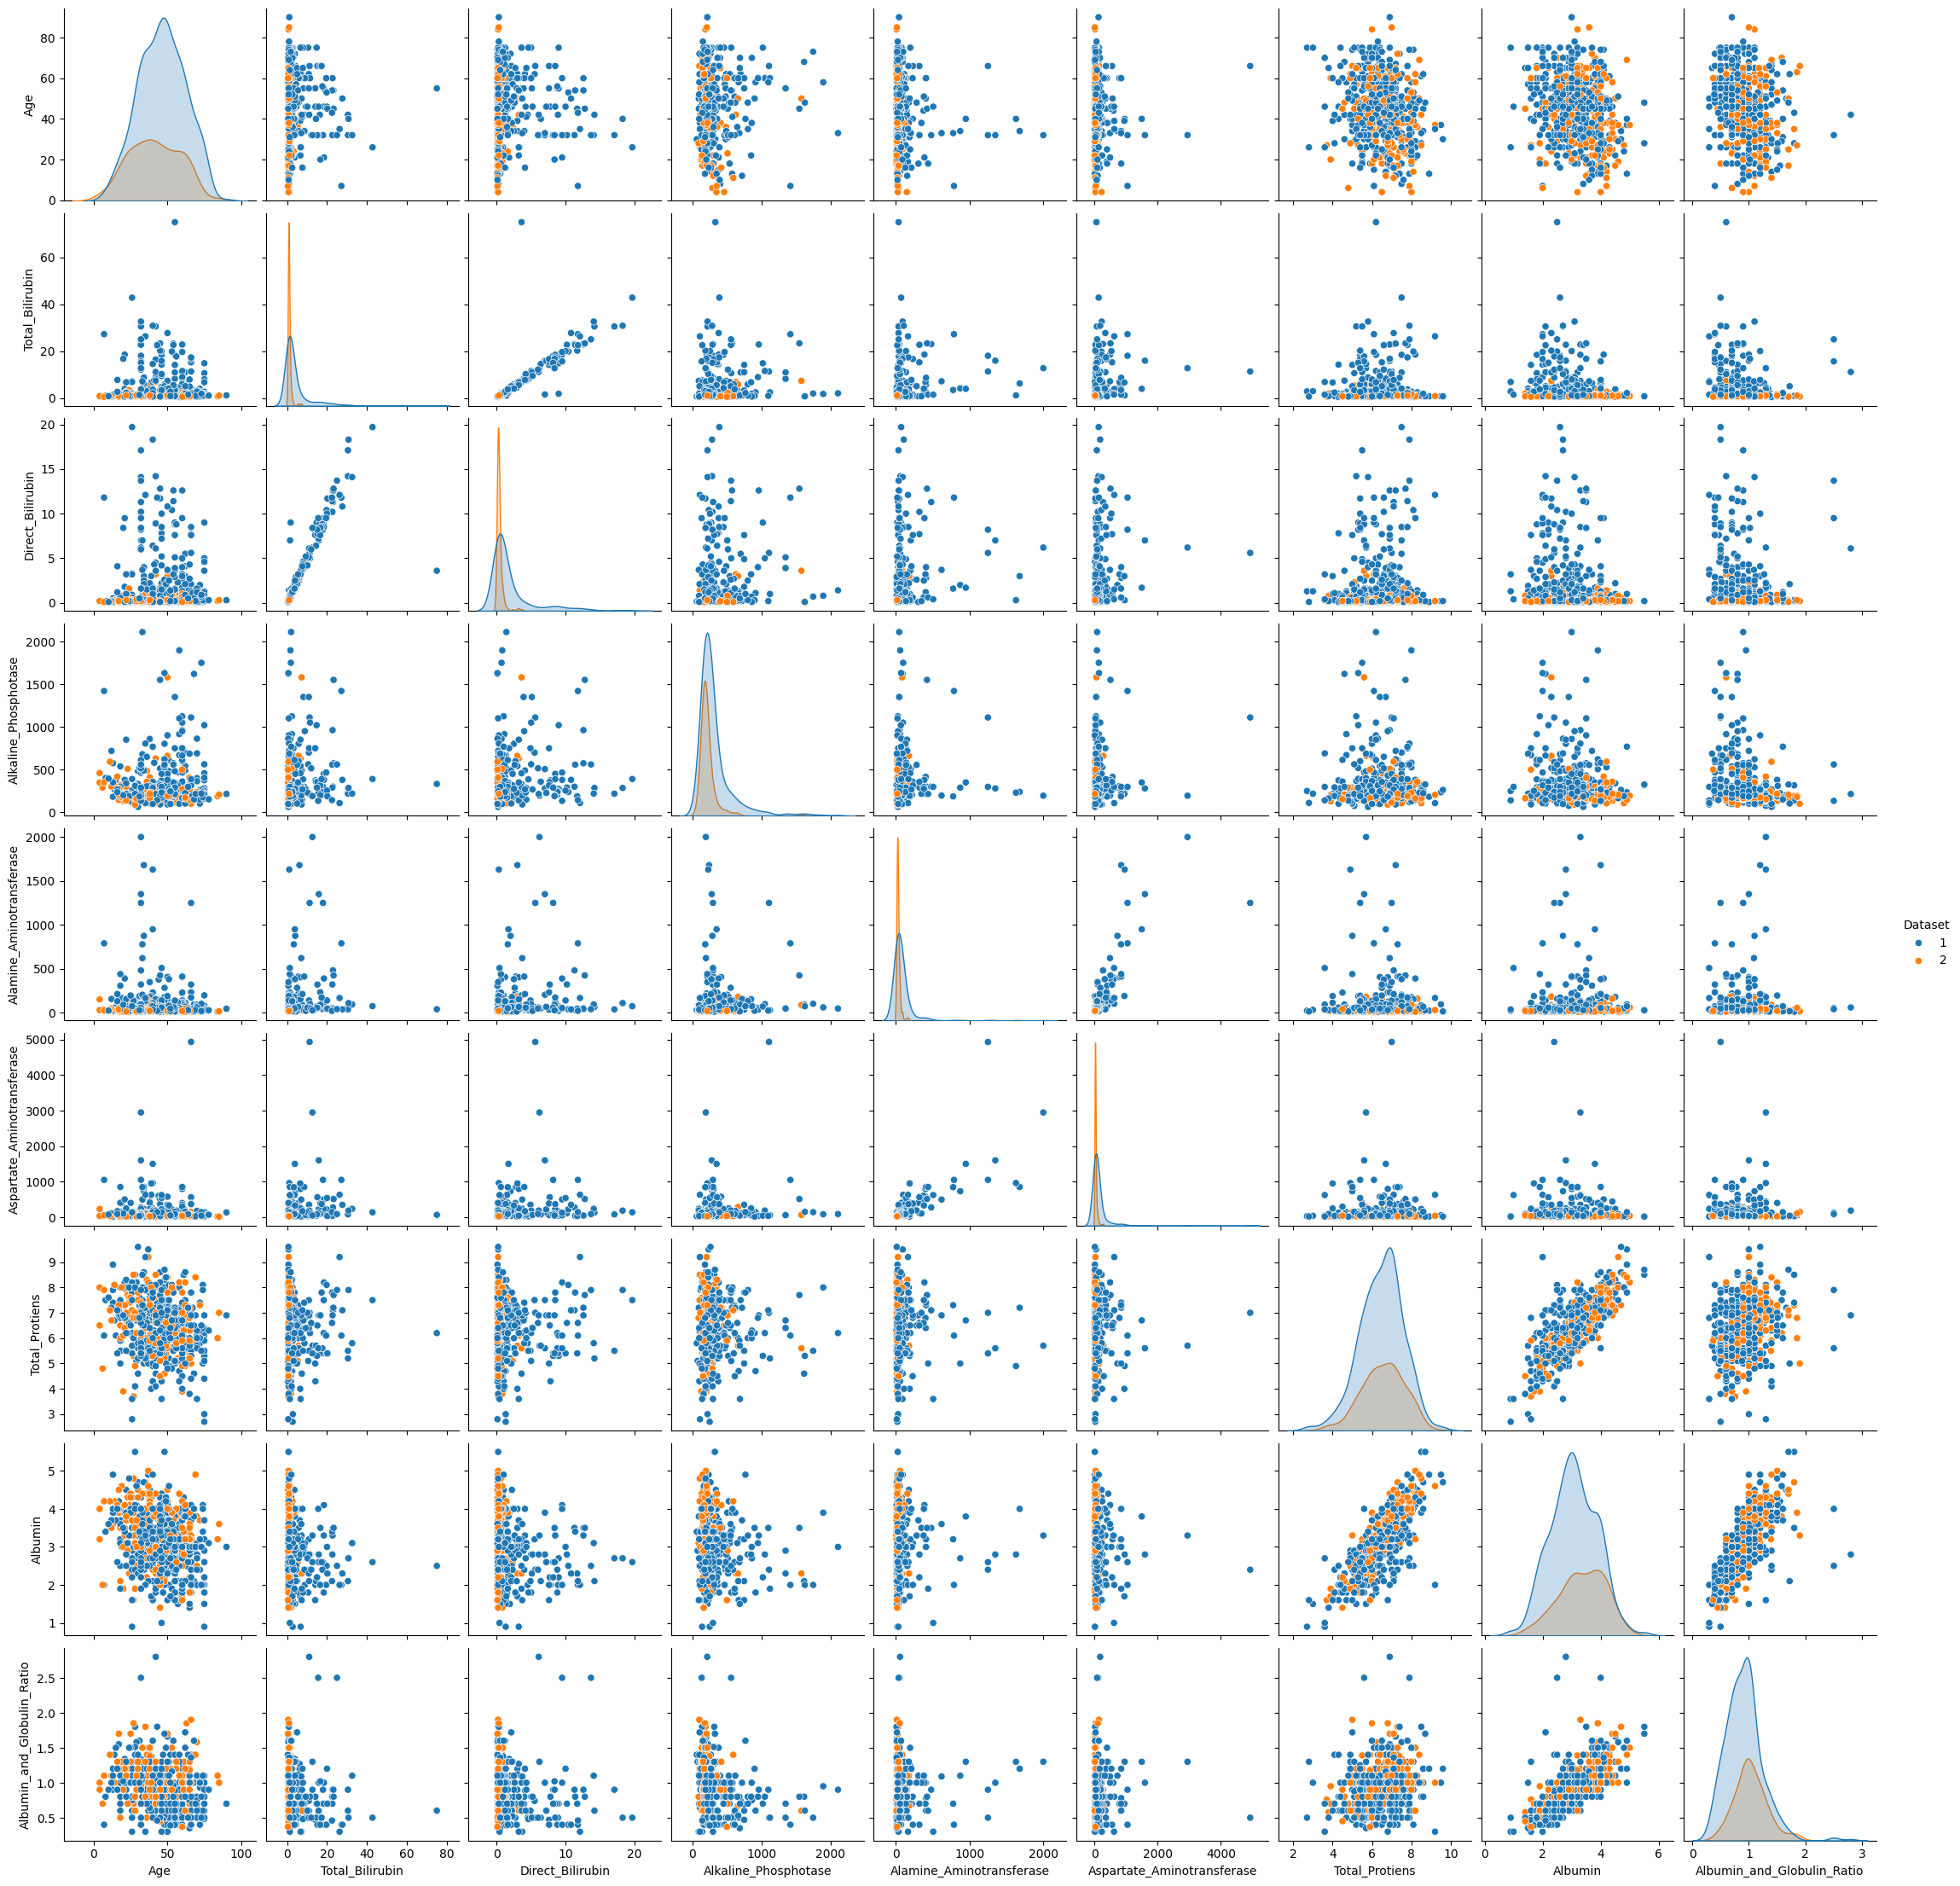

In [25]:
sns.pairplot(data,hue='Dataset', palette= 'tab10')
plt.show()

* From the above pairplot features like:
    * Total Bilirubin and Direct Bilirubin are highly correlated
    * Total Protiens and Albumin, Albumin and Albumin and Globulin ratio are also highly correaleted but it could cause multicollinearity, 
    * Alamine Aminotransferase and Aspartate Aminotransferase are moderatly correlated.
* Several features has extreame outliers.

#### Final Conclusion from EDA

* Total and Direct Bilirubin, Alkaline Phosphotase, Alanine Aminotransferase, Aspartate Aminotransferase these enzymes are higher in diseased patients.
* Albumin and Albumin and Globulin ratio are lower in diseased patients.
* These features also have extreme outliers
* Patients who has liver disease are mostly middle age group people.